# World Bank Financial Inclusion Classification Project 3

Christian Branton

In [286]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, classification_report,accuracy_score, confusion_matrix, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

from xgboost import XGBClassifier

from mlxtend.plotting import plot_confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Explanation of the feature set and what the answers represent for each feature
http://microdata.worldbank.org/index.php/catalog/3324/datafile/F2/?offset=0&limit=100

Also where to download the dataset (at the microdata tab)
Dataset of average lifespan by country
https://www.cia.gov/library/publications/the-world-factbook/rankorder/2102rank.html

List and explanation of features including in the dataset as well as response meaning:

economy = Economy

economycode	= Economy Code

regionwb = Region, WB

pop_adult = Population 15+, 2016, WDI

wpid_random = Gallup World Poll identifier

wgt = Weight

female = Respondent is female // 1 is male,	2 is female

age	= Respondent age

educ = Respondent education level // 1 = completed primary or less,	2=secondary, 3=completed tertiary or more, 4=(dk), 5=(rf)

inc_q = Within-economy household income quintile // 1=Poorest 20%, 2=Second20%, 3=Middle20%, 4=Fourth20%, 5=richest20%

emp_in = Respondent is in the workforce // 0=out of workforce, 1=in workforce

fin2 = Has a debit card // 1=yes, 2=no, 3=(dk), 4=(ref)

fin3 = If has debit card: card in own name // 1=yes, 2=no, 3=(dk), 4=(ref)

fin4 = If has debit card: used card in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin5 = Used mobile phone or internet to access FI account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin6 = Used mobile phone or internet to check account balance // 1=yes, 2=no, 3=(dk), 4=(ref)

fin7 = Has a credit card // 1=yes, 2=no, 3=(dk), 4=(ref)

fin8 = If has credit card: used card in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin9 = If has account: any deposit into account in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin10 = If has account: any withdrawal from account in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11a = If does not have account: b/c too far away // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11b = If does not have account: b/c too expensive // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11c = If does not have account: b/c lack documentation // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11d = If does not have account: b/c lack trust // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11e = If does not have account: b/c religious reasons // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11f = If does not have account: b/c lack of money // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11g = If does not have account: b/c family member already has one // 1=yes, 2=no, 3=(dk), 4=(ref)

fin11h = If does not have account: b/c no need for financial services // 1=yes, 2=no, 3=(dk), 4=(ref)

fin14a = Made bill payments online using the Internet // 1=yes, 2=no, 3=(dk), 4=(ref)

fin14b = Bought something online using the Internet // 1=yes, 2=no, 3=(dk), 4=(ref)

fin14c = Paid online or in cash at delivery // 1=Pay online, 2=In Cash, 3=(dk), 4=(ref)

fin15 = Saved in past 12 months: for farm/business purposes // 1=yes, 2=no, 3=(dk), 4=(ref)

fin16 = Saved in past 12 months: for old age // 1=yes, 2=no, 3=(dk), 4=(ref)

fin17a = Saved in past 12 months: using an account at a financial institution // 1=yes, 2=no, 3=(dk), 4=(ref)

fin17b = Saved in past 12 months: using an informal savings club // 1=yes, 2=no, 3=(dk), 4=(ref)

fin19 = Has loan from a financial institution for home, apartment, or land // 1=yes, 2=no, 3=(dk), 4=(ref)

fin20 = Borrowed in past 12 months: for medical purposes // 1=yes, 2=no, 3=(dk), 4=(ref)

fin21 = Borrowed in past 12 months: for farm/business purposes // 1=yes, 2=no, 3=(dk), 4=(ref)

fin22a = Borrowed in past 12 months: from a financial institution // 1=yes, 2=no, 3=(dk), 4=(ref)

fin22b = Borrowed in past 12 months: from family or friends // 1=yes, 2=no, 3=(dk), 4=(ref)

fin22c = Borrowed in past 12 months: from an informal savings club // 1=yes, 2=no, 3=(dk), 4=(ref)

fin24 = Possibility of coming up with emergency funds // 1=Possible, 2=Not Possible	, 3=(dk), 4=(ref)

fin25 = Main source of emergency funds // 1=Savings, 2=Family or friends, 3=Money from Working, 4=Borrowing from bank,employer,privateloan, 5=Selling Assets, 6=Some other source, 7=(dk), 8=ref

fin26 = Sent domestic remittances in past 12 months// 1=yes, 2=no, 3=(dk), 4=(ref)

fin27a = If sent domestic remittances: through a financial institution// 1=yes, 2=no, 3=(dk), 4=(ref)

fin27b = If sent domestic remittances: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin27c1 = If sent domestic remittances: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin27c2 = If sent domestic remittances: through an MTO // 1=yes, 2=no, 3=(dk), 4=(ref)

fin28 = Received domestic remittances in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin29a = If received domestic remittances: through a financial institution // 1=yes, 2=no, 3=(dk), 4=(ref)

fin29b = If received domestic remittances: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin29c1 = If received domestic remittances: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin29c2	= If received domestic remittances: through an MTO // 1=yes, 2=no, 3=(dk), 4=(ref)

fin30 = Paid utility bills in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin31a = If paid utility bills: using an account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin31b = If paid utility bills: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin31c = If paid utility bills: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin32 = Received wage payments in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin33 = If received wage payments: work in public sector // 1=yes, 2=no, 3=(dk), 4=(ref)

fin34a = If received wage payments: into an account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin34b = If received wage payments: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin34c1 = If received wage payments: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin34c2 = If received wage payments: to a card // 1=yes, 2=no, 3=(dk), 4=(ref)

fin35 = If received cashless wage payments: first account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin36 = If received cashless wage payments: opened to receive payments // 1=yes, 2=no, 3=(dk), 4=(ref)

fin37 = Received government transfers in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin38 = Received government transfers in past 12 months: pension // 1=yes, 2=no, 3=(dk), 4=(ref)

fin39a = If received government transfers: into an account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin39b = If received government transfers: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin39c1	= If received government transfers: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin39c2	= If received government transfers: to a card // 1=yes, 2=no, 3=(dk), 4=(ref)

fin40 = If received cashless government transfers: first account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin41 = If received cashless government transfers: opened to receive payments // 1=yes, 2=no, 3=(dk), 4=(ref)

fin42 = Received agricultural payments in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin43a = If received agricultural payments: into an account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin43b = If received agricultural payments: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin43c1 = If received agricultural payments: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin43c2 = If received agricultural payments: to a card // 1=yes, 2=no, 3=(dk), 4=(ref)

fin44 = If received agricultural payments: opened to receive payments // 1=yes, 2=no, 3=(dk), 4=(ref)

fin45 = If received agricultural payments: opened to receive payments // 1=yes, 2=no, 3=(dk), 4=(ref)

fin46 = Received self-employment payments: in past 12 months // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47a = If received self-employment payments: into an account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47b = If received self-employment payments: through a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47c1 = If received self-employment payments: in cash // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47c2 = If received self-employment payments: to a card // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47c3 = Marginal: Used debit card in your own name // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47c4 = Marginal: Used mobile phone or internet to access FI account // 1=yes, 2=no, 3=(dk), 4=(ref)

fin47c5 = Marginal: Used mobile phone or internet to check account balance // 1=yes, 2=no, 3=(dk), 4=(ref)

mobileowner = Owns a mobile phone // 1=yes, 2=no, 3=(dk), 4=(ref)

fin48 = Has a national ID // 1=yes, 2=no, 3=(dk), 4=(ref)

account_fin = Has an account at a financial institution // 0=yes, 1=no, 2=dk, 3=ref

account_mob = Has a mobile money account // 0=yes, 1=no, 2=dk, 3=ref

account = Has an account // 0=yes, 1=no, 2=dk, 3=ref

saved = Saved in the past year // 0=yes, 1=no, 2=dk, 3=ref

borrowed = Borrowed in the past year // 0=yes, 1=no, 2=dk, 3=ref

receive_wages = Payments: wage payments // 1=Into an account, 2=Family or friend, 3=Money from Working, 4=Borrowing from bank,employer,privateloa, 5=Selling Assets, 6=Some other source, 7=(dk), 8=ref

receive_transfers = Payments: government transfers // 1=??, 2=??, 3=??, 4=??, 5=??

receive_pension = Payments: government pension // 1=??, 2=??, 3=??, 4=??, 5=??

receive_agriculture = Payments: selling agricultural goods // 1=??, 2=??, 3=??, 4=??, 5=??

pay_utilities = Payments: utility bills // 1=??, 2=??, 3=??, 4=??, 5=??

remittances = Domestic remittances // 1=??, 2=??, 3=??, 4=??, 5=??

pay_online = Pay online [of adults]- F2F // 0=no/dk/ref, 1=yes

pay_online_mobintbuy = Pay online [of buyers]- F2F // 0=no/dk/ref, 1=yes

pay_cash = Pay in cash when order is delivered [of adults]- F2F // 0=no/dk/ref, 1=yes

pay_cash_mobintbuy = Pay in cash when order is delivered [of buyers]- F2F // 0=no/dk/ref, 1=yes

In [2]:
fulldf = pd.read_csv('micro_world copy.csv')

In [3]:
fulldf = fulldf.fillna(-5000)
fulldf = fulldf[fulldf.fin24 != 3.0]#.fin25.value_counts()
fulldf = fulldf[fulldf.fin24 != 4.0]#.fin25.value_counts()
fulldf.fin24.replace(to_replace = 2, value=0, inplace=True)

## WEO dataset
importing dataset, creating pivot table, changing country names to match fulldf, finding years with most data

In [4]:
weodf = pd.read_csv('weo2014.csv', encoding = "ISO-8859-1")

In [5]:
#weodf['WEO Subject Code'].unique()
weodf[weodf.Country == 'Ukraine'].head()
weodf.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-

In [6]:
#weodf.groupby('Country').pivot(index=weodf.Country, columns='WEO Subject Code')['2017']
#weodf.groupby(['Country','WEO Subject Code']).size().unstack('WEO Subject Code', fill_value='2017')
nweodf = weodf.pivot_table(values='2017', index=weodf['Country'], columns='WEO Subject Code', aggfunc='first').reset_index()
ukrdf = weodf[weodf.Country == 'Ukraine']
ukrdf = ukrdf.pivot_table(values='2013', index=weodf['Country'], columns='WEO Subject Code', aggfunc='first').reset_index()
#pd.pivot_table(weodf, index=['Country'], columns=['WEO Subject Code'], aggfunc=len, fill_value=0)
nweodf = pd.concat([nweodf, ukrdf],sort=False)
nweodf.head()
ukrdf.head()
#test
#nweodf[nweodf.Country == 'Syria']

WEO Subject Code,Country,BCA,BCA_NGDPD,GGR,GGR_NGDP,GGSB,GGSB_NPGDP,GGX,GGXCNL,GGXCNL_NGDP,...,PCPIEPCH,PCPIPCH,PPPEX,PPPGDP,PPPPC,PPPSH,TMG_RPCH,TM_RPCH,TXG_RPCH,TX_RPCH
0,Ukraine,-16.325,-9.18,634.8,43.723,-61.735,-4.21,699.9,-65.1,-4.484,...,0.496,-0.261,4.311,336.807,"7,423.13",0.387,-4.129,-4.129,-8.32,-8.32


In [7]:
nweodf.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'FYR Macedonia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',


In [8]:
for c in fulldf.economy.unique():
    if c not in nweodf.Country.tolist():
        print (c)

Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Egypt, Arab Rep.
Hong Kong SAR, China
Iran, Islamic Rep.
Korea, Rep.
Lao PDR
Macedonia, FYR
Russian Federation
Taiwan, China
Venezuela, RB
West Bank and Gaza


In [9]:
nweodf.replace(to_replace=['Democratic Republic of the Congo','Republic of Congo',"Côte d'Ivoire",'Egypt',
                           'Hong Kong SAR','Islamic Republic of Iran','Korea','Lao P.D.R.','FYR Macedonia',
                          'Russia','Taiwan Province of China','Venezuela'], 
               value=['Congo, Dem. Rep.','Congo, Rep.',"Cote d'Ivoire",'Egypt, Arab Rep.','Hong Kong SAR, China',
                     'Iran, Islamic Rep.','Korea, Rep.','Lao PDR','Macedonia, FYR','Russian Federation',
                     'Taiwan, China','Venezuela, RB'], inplace=True)

In [10]:
#nweodf
##nweodf.apply(lambda x: x.replace(',',''))
nweodf = nweodf.astype(str).replace(to_replace=',', value='',regex=True)
nweodf = nweodf.astype(str).replace(to_replace='nan', value=-9999,regex=True)
nweodf = nweodf.astype(str).replace(to_replace='--', value=-9999,regex=True)
#nweodf = nweodf.astype(float)
column_names= list(nweodf.columns)[1:]
#mask = nweodf[column_names]!= np.nan
nweodf[column_names] = nweodf[column_names].astype(float)
#nweodf = nweodf.replace(to_replace='nan', value=np.nan,regex=True)
#nweodf = nweodf.replace(to_replace='--', value=np.nan,regex=True)
nweodf.dtypes#.isna().sum()

Country          object
BCA             float64
BCA_NGDPD       float64
GGR             float64
GGR_NGDP        float64
GGSB            float64
GGSB_NPGDP      float64
GGX             float64
GGXCNL          float64
GGXCNL_NGDP     float64
GGXONLB         float64
GGXONLB_NGDP    float64
GGXWDG          float64
GGXWDG_NGDP     float64
GGXWDN          float64
GGXWDN_NGDP     float64
GGX_NGDP        float64
LP              float64
LUR             float64
NGAP_NPGDP      float64
NGDP            float64
NGDPD           float64
NGDPDPC         float64
NGDPPC          float64
NGDPRPC         float64
NGDP_D          float64
NGDP_FY         float64
NGDP_R          float64
NGDP_RPCH       float64
NGSD_NGDP       float64
NID_NGDP        float64
PCPI            float64
PCPIE           float64
PCPIEPCH        float64
PCPIPCH         float64
PPPEX           float64
PPPGDP          float64
PPPPC           float64
PPPSH           float64
TMG_RPCH        float64
TM_RPCH         float64
TXG_RPCH        

In [11]:
nweodf.rename(columns={'Country':'economy'},inplace=True)
fulldf_weo = fulldf.merge(nweodf, how='left', on='economy')
total_fulldf = fulldf.merge(nweodf, how='left', on='economy')

## World Bank Education Dataset
importing dataset, creating pivot table, changing country names to match fulldf, finding years with most data

In [12]:
wbedudf = pd.read_csv('wb_edu/wb_edu_dataset.csv')#,header=None, names=column_names)
wbedudf.columns.values
years = ['2013','2014','2015','2016','2017','2018']
for i in years:
    print(wbedudf[i].isna().sum())

20215
19561
19767
20829
27043
38064


In [13]:
wbedudf.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Children out of school (% of primary school age),SE.PRM.UNER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.08025,NaN,NaN,NaN,0.70801,NaN,NaN,NaN,NaN,NaN
1,Aruba,ABW,"Children out of school, male (% of male primar...",SE.PRM.UNER.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.80808,NaN,NaN,NaN,NaN,NaN
2,Aruba,ABW,"Children out of school, primary, male",SE.PRM.UNER.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.00000,NaN,NaN,NaN,NaN,NaN
3,Aruba,ABW,"Children out of school, female (% of female pr...",SE.PRM.UNER.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.60370,NaN,NaN,NaN,NaN,NaN
4,Aruba,ABW,"Children out of school, primary, female",SE.PRM.UNER.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25.00000,NaN,NaN,NaN,NaN,NaN


In [14]:
nwbedudf = wbedudf.pivot_table(values='2014', index=wbedudf['Country Name'], columns='Indicator Code', aggfunc='first').reset_index()
nwbedudf.rename(columns={'Country Name':'economy'},inplace=True)

In [15]:
for c in fulldf.economy.unique():
    if c not in nwbedudf.economy.tolist():
        print (c)

Kosovo
Macedonia, FYR
Taiwan, China


In [16]:
nwbedudf.economy.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [17]:
nwbedudf
#nwbedudf = nwbedudf.astype(str).replace(to_replace=',', value='',regex=True)
#nwbedudf = nwbedudf.astype(str).replace(to_replace='nan', value=0,regex=True)
nwbedudf = nwbedudf.replace(to_replace=np.nan, value=-9999)#,regex=True)

#column_names2= list(nwbedudf.columns)[1:]

#nwbedudf[column_names2] = nwbedudf[column_names2].astype(float)
#nwbedudf.dtypes

In [18]:
nwbedudf.replace(to_replace=['North Macedonia'],value=['Macedonia, FYR'], inplace=True)
fulldf_edu = fulldf.merge(nwbedudf, how='left', on='economy')
total_fulldf = total_fulldf.merge(nwbedudf, how='left', on='economy')

## World Bank Health Dataset
importing dataset, creating pivot table, changing country names to match fulldf, finding years with most data

In [19]:
wbhealthdf = pd.read_csv('wb_health/wb_health_dataset.csv')#,header=None, names=column_names)
wbhealthdf.columns.values
years = ['2013','2014','2015','2016','2017','2018']
for i in years:
    print(wbhealthdf[i].isna().sum())

32646
32410
28410
33128
41804
66500


In [20]:
nwbhealthdf = wbhealthdf.pivot_table(values='2015', index=wbhealthdf['Country Name'], columns='Indicator Code', aggfunc='first').reset_index()
nwbhealthdf.rename(columns={'Country Name':'economy'},inplace=True)


In [21]:
for c in fulldf.economy.unique():
    if c not in nwbhealthdf.economy.tolist():
        print (c)

Macedonia, FYR
Taiwan, China


In [22]:
nwbhealthdf.economy.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Arab World', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacif

In [23]:
#nwbhealthdf
#nwbhealthdf = nwbhealthdf.astype(str).replace(to_replace=',', value='',regex=True)
#nwbhealthdf = nwbhealthdf.astype(str).replace(to_replace='nan', value=0,regex=True)
nwbhealthdf = nwbhealthdf.replace(to_replace=np.nan, value=-9999)#,regex=True)

In [24]:
nwbhealthdf.replace(to_replace=['North Macedonia'],value=['Macedonia, FYR'], inplace=True)
fulldf_health = fulldf.merge(nwbhealthdf, how='left', on='economy')
total_fulldf = total_fulldf.merge(nwbhealthdf, how='left', on='economy')

In [25]:
fulldf.shape

(149810, 105)

## Life Expectancy
importing dataset, creating pivot table, changing country names to match fulldf, finding years with most data

In [24]:
column_names= ['index','economy','lifeexp','nan']
lifedf = pd.read_csv('rawdata_2102.csv',header=None, names=column_names)
lifedf.drop(['index','nan'],axis=1,inplace=True)
#ldfcnames = lifedf.country.unique()
#ldfcnames
#sorted(ldfcnames)

In [26]:
for c in fulldf.economy.unique():
    if c not in lifedf.economy.tolist():
        print (c)

Kosovo
Montenegro


In [535]:
fulldf = fulldf.merge(lifedf, how='left', on='economy')
fulldf[fulldf.economy == 'Kosovo'].head()

,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy,lifeexp
70963,Kosovo,XKX,Europe & Central Asia (excluding high income),1318176.625,203074358,1.238325,2,55.0,1.0,2,...,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN,NaN
70964,Kosovo,XKX,Europe & Central Asia (excluding high income),1318176.625,115753651,0.990660,2,50.0,1.0,4,...,4,4,4.0,3,3.0,0.0,NaN,0.0,NaN,NaN
70965,Kosovo,XKX,Europe & Central Asia (excluding high income),1318176.625,136304006,1.121475,2,23.0,2.0,5,...,4,4,4.0,4,3.0,1.0,1.0,0.0,0.0,NaN
70966,Kosovo,XKX,Europe & Central Asia (excluding high income),1318176.625,209282295,1.070401,2,27.0,1.0,1,...,4,4,4.0,4,5.0,0.0,NaN,0.0,NaN,NaN
70967,Kosovo,XKX,Europe & Central Asia (excluding high income),1318176.625,202734345,0.334101,1,30.0,2.0,5,...,4,4,4.0,2,5.0,0.0,NaN,0.0,NaN,NaN


## Quick Analyses of Data(Russian Federation)

In [784]:
print(fulldf.shape)
fdfcnames = fulldf.economy.unique()
#sorted(fdfcnames)

(154923, 847)


In [26]:
rusdf = fulldf[fulldf['economycode'] == 'RUS']
print(rusdf.shape)
rusdf.head()

(1863, 105)


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
118295,Russian Federation,RUS,Europe & Central Asia (excluding high income),119382752.0,151170125,2.076512,1,16.0,1.0,3,...,4,4,4,4.0,4,1.0,0.0,0.0,1.0,1.0
118296,Russian Federation,RUS,Europe & Central Asia (excluding high income),119382752.0,116304786,0.899897,2,25.0,3.0,1,...,1,4,4,4.0,1,5.0,0.0,-5000.0,0.0,-5000.0
118297,Russian Federation,RUS,Europe & Central Asia (excluding high income),119382752.0,115620033,0.957976,2,33.0,3.0,4,...,1,4,4,4.0,1,5.0,0.0,0.0,1.0,1.0
118298,Russian Federation,RUS,Europe & Central Asia (excluding high income),119382752.0,150356097,1.246428,2,34.0,2.0,4,...,1,1,4,4.0,1,1.0,0.0,0.0,1.0,1.0
118299,Russian Federation,RUS,Europe & Central Asia (excluding high income),119382752.0,116601227,1.102315,1,46.0,2.0,2,...,4,4,4,2.0,4,4.0,0.0,-5000.0,0.0,-5000.0


In [100]:
#To check how it works with nulls
rusdf["fin27a"].head()

118295    1.0
118296    9.0
118297    9.0
118298    9.0
118299    9.0
Name: fin27a, dtype: float64

In [101]:
rusdf["fin24"].unique()

array([1, 0])

In [102]:
rusdf["fin24"].value_counts()

1    1077
0     786
Name: fin24, dtype: int64

fin25 nulls is equivalent to fin24 2+3+4 such that fin25 nulls is by default the inability to procure money for emergency funds

In [55]:
print(rusdf['fin24'].isna().sum())
print(rusdf['fin24'].value_counts())

0
1    1077
2     786
3     115
4      22
Name: fin24, dtype: int64


In [56]:
print(rusdf['educ'].unique())
rusdf['educ'].value_counts()

[1. 3. 2. 5.]


2.0    1168
3.0     593
1.0     238
5.0       1
Name: educ, dtype: int64

In [57]:
rusdf['inc_q'].unique()

array([3, 1, 4, 2, 5])

In [58]:
print(rusdf['age'].sort_values().head())
print(rusdf['age'].sort_values().tail())

118510    15.0
119900    15.0
119865    15.0
119863    15.0
119862    15.0
Name: age, dtype: float64
119363    91.0
118986    91.0
118703    91.0
118980    92.0
118755    93.0
Name: age, dtype: float64


In [59]:
print(rusdf['receive_pension'].value_counts())
print(rusdf['fin38'].value_counts())

4    1250
1     426
2     268
3      40
5      16
Name: receive_pension, dtype: int64
2    1250
1     734
3       9
4       7
Name: fin38, dtype: int64


In [63]:
print(rusdf['remittances'].value_counts())
print(rusdf['fin28'].value_counts())

5.0    1241
1.0     371
2.0     194
3.0     106
4.0      61
6.0      27
Name: remittances, dtype: int64
2.0    1560
1.0     413
4.0      17
3.0      10
Name: fin28, dtype: int64


In [70]:
#replacing nulls with 0 such that 0=does not have a credit card, and can thus drop feature fin7
print(rusdf.fin8.isna().sum())
print(rusdf.fin8.value_counts())
rusdf.fin8.replace(to_replace=np.nan, value=0, inplace=True)
rusdf.fin8.value_counts()

0
9.0    1596
1.0     308
2.0      93
3.0       2
4.0       1
Name: fin8, dtype: int64


/Users/christianbranton/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


9.0    1596
1.0     308
2.0      93
3.0       2
4.0       1
Name: fin8, dtype: int64

In [71]:
print(rusdf.fin9.value_counts())
print(rusdf.fin9.isna().sum())
print(rusdf.fin10.value_counts())
print(rusdf.fin10.isna().sum())

1.0    951
9.0    788
2.0    245
4.0     10
3.0      6
Name: fin9, dtype: int64
0
1.0    995
9.0    788
2.0    198
4.0     10
3.0      9
Name: fin10, dtype: int64
0


## Quick Analyses of Data(OECD Region)

In [64]:
fulldf.regionwb.value_counts()

Sub-Saharan Africa (excluding high income)            35000
High income: OECD                                     31066
Europe & Central Asia (excluding high income)         23062
Latin America & Caribbean (excluding high income)     16504
Middle East & North Africa (excluding high income)    14145
East Asia & Pacific (excluding high income)           13833
High income: nonOECD                                  11609
South Asia                                             8704
9.0                                                    1000
Name: regionwb, dtype: int64

In [65]:
fulldf[fulldf['regionwb'] == 'High income: OECD'].fin24.value_counts()

1    23440
2     6863
3      499
4      264
Name: fin24, dtype: int64

In [66]:
fulldf[fulldf['regionwb'] == 'High income: nonOECD'].fin24.value_counts()

1    7041
2    4198
3     250
4     120
Name: fin24, dtype: int64

In [67]:
fulldf[fulldf['regionwb'] == 'Sub-Saharan Africa (excluding high income)'].fin24.value_counts()

2    18867
1    15237
3      837
4       59
Name: fin24, dtype: int64

In [68]:
nfulldf = pd.crosstab(fulldf.regionwb, fulldf.fin24).drop([3,4],axis=1)
#nfulldf = nfulldf.drop([3,4],axis=1)
nfulldf['normalized1'] = nfulldf[1]/(nfulldf[1]+nfulldf[2])
nfulldf['normalized2'] = nfulldf[2]/(nfulldf[1]+nfulldf[2])
nfulldf

fin24,1,2,normalized1,normalized2
regionwb,,,,
9.0,645,335,0.658163,0.341837
East Asia & Pacific (excluding high income),7368,5929,0.554110,0.445890
Europe & Central Asia (excluding high income),14044,7356,0.656262,0.343738
High income: OECD,23440,6863,0.773521,0.226479
High income: nonOECD,7041,4198,0.626479,0.373521
Latin America & Caribbean (excluding high income),7285,8873,0.450860,0.549140
Middle East & North Africa (excluding high income),7551,6242,0.547452,0.452548
South Asia,4548,3988,0.532802,0.467198
Sub-Saharan Africa (excluding high income),15237,18867,0.446780,0.553220


# Removing features
First, I decided to remove economycode since it is simply a shorthand code for the name of the country which is already provided and is a redundant feature as well as the Gallop World Poll Identifier since it serves no use for our classification purposes.

    ```['wpid_random','economycode']```

Then I removed features which i engineered in such a way that made other features redundant

    ```['fin7']```

Then I started pruning the features that added too much noise and that I felt did not serve the purpose of improving our classification scoring.

    ```['fin5','fin6']```




In [360]:
rusdf.drop(['wpid_random','economycode','fin5','fin6','fin7','fin27a','fin27b','fin27c1','fin27c2',''], axis=1).head()

# Pickle

In [ ]:
with open('subrusdf.pkl', 'wb') as picklefile:
    pickle.dump(rusdf, picklefile)

## MODELING (Russian Federation)
The modeling was focused on logistic regression, random forest classifier, and xgboost.
This was focused first on the Russian Federation

In [103]:
rusdf.fin24.value_counts()

1    1077
0     786
Name: fin24, dtype: int64

In [27]:
#TESTING
#rusdf['fin24'].replace(to_replace=np.nan, value=0,inplace=True)
#rusdf = rusdf[rusdf.fin24 != 3.0]#.fin25.value_counts()
#rusdf = rusdf[rusdf.fin24 != 4.0]#.fin25.value_counts()
#rusdf.fin24.replace(to_replace = 2, value=0)
y = rusdf.fin24
X = rusdf[['pop_adult','female','age','educ','inc_q','emp_in']]

In [319]:

def logreg(X, y):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=44)
    logr = LogisticRegression(solver='lbfgs')
    logr.fit(X_tr,y_tr)
    scores = cross_val_score(logr, X_tr, y_tr, cv=5, scoring='f1')
    ypred = logr.predict(X_te)
    print(confusion_matrix(y_te, ypred))
    print('f1 score for cross validation:',scores)
    print('f1 score mean for cv:',np.mean(scores))
    print('f1_score for test:',f1_score(y_te, ypred))
    return
"""
def logregcv(X, y):
    std_scaler = StandardScaler()
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=44)
    logr = LogisticRegressionCV()
    """
#trees = np.arange(20,400,20)
#print(trees)
#for tree in trees:
def rfcfunc(X, y):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=44)
    rfc = RandomForestClassifier(class_weight='balanced', random_state=44)#, min_samples_split=)
    rfc.fit(X_tr,y_tr)
    scores = cross_val_score(rfc, X_tr, y_tr, cv=5, scoring='f1')
    accscores = cross_val_score(rfc, X_tr, y_tr, cv=5)
    yrfcpred = rfc.predict(X_te)
    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X_tr.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)    
    print(confusion_matrix(y_te, yrfcpred))
    print('f1 score for cross validation:',scores)
    print('f1 score mean for cv:',np.mean(scores))
    print('f1_score for test:',f1_score(y_te, yrfcpred))
    return feature_importances

def xgboost(X, y):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=44)
    xgb = XGBClassifier(class_weight='balanced', random_state=44)
    xgb.fit(X_tr,y_tr)
    scores = cross_val_score(xgb, X_tr, y_tr, cv=5, scoring='f1')
    yxgbpred = xgb.predict(X_te)
    #feature_importances = pd.DataFrame(xgb.feature_importances_,
    #                               index = X_tr.columns,
    #                                columns=['importance']).sort_values('importance',ascending=False)
    print(confusion_matrix(y_te, yxgbpred))
    print('f1 score for cross validation:',scores)
    print('f1 score mean for cv:',np.mean(scores))
    print('f1_score for test:',f1_score(y_te, yxgbpred))
    print('acc score:',accuracy_score(y_te, yxgbpred))
    return# feature_importances

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(25,10))
feature_importances.plot(kind='bar', ax=ax)

In [41]:
#logreg(X, y)
rfcfunc(X, y)
xgboost(X ,y)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[135  94]
 [127 203]]
f1 score for cross validation: [0.64383562 0.66025641 0.60350877 0.64583333 0.66898955]
f1 score mean for cv: 0.6444847357992504
f1_score for test: 0.6475279106858054
[[116 113]
 [ 77 253]]
f1 score for cross validation: [0.70700637 0.75316456 0.72380952 0.7184466  0.72964169]
f1 score mean for cv: 0.7264137491902246
f1_score for test: 0.7270114942528737


different models for different countries and different regions

In [454]:
"""X['lifeexp'] = rusdf['lifeexp']
X['fin2'] = rusdf['fin2']
logreg(X, y)
rfcfunc(X, y)"""

[[324   0]
 [229   0]]
f1 score for cross validation: [0.72413793 0.72413793 0.72456576 0.72456576 0.72456576]
[[215 109]
 [108 121]]
f1 score for cross validation: [0.67936508 0.63728814 0.64918033 0.63945578 0.68646865]


/Users/christianbranton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/christianbranton/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22

In [42]:
X2 = rusdf.drop(['fin24','regionwb','economy','economycode','wpid_random','fin25'], axis=1)
X2 = X2.fillna(9.0)
#logreg(X2, y)
rfcfunc(X2, y)
xgboost(X2 ,y)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[143  86]
 [ 97 233]]
f1 score for cross validation: [0.71710526 0.75083056 0.69896194 0.71333333 0.7147541 ]
f1 score mean for cv: 0.7189970394704399
f1_score for test: 0.7180277349768874
[[140  89]
 [ 71 259]]
f1 score for cross validation: [0.75796178 0.79245283 0.75       0.73578595 0.74598071]
f1 score mean for cv: 0.7564362548401851
f1_score for test: 0.7640117994100295


## MODELING (Europe & Central Asia)
The modeling was focused on logistic regression, random forest classifier, and xgboost.
This was focused first on the Europe & Central Asia

In [43]:
eca = fulldf[fulldf['regionwb'] == 'Europe & Central Asia (excluding high income)']
print(eca.shape)
eca.head()

(21400, 105)


,economy,economycode,regionwb,pop_adult,wpid_random,wgt,female,age,educ,inc_q,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,pay_onlne,pay_onlne_mobintbuy,pay_cash,pay_cash_mobintbuy
1000,Albania,ALB,Europe & Central Asia (excluding high income),2366387.0,135818705,0.504113,2,35.0,1.0,3,...,2,4,4,4.0,2,5.0,0.0,-5000.0,0.0,-5000.0
1001,Albania,ALB,Europe & Central Asia (excluding high income),2366387.0,132355765,1.768498,1,27.0,2.0,2,...,1,4,4,2.0,4,5.0,0.0,-5000.0,0.0,-5000.0
1002,Albania,ALB,Europe & Central Asia (excluding high income),2366387.0,153857119,0.702580,2,53.0,1.0,4,...,4,4,4,4.0,2,5.0,0.0,-5000.0,0.0,-5000.0
1003,Albania,ALB,Europe & Central Asia (excluding high income),2366387.0,139874640,1.851668,2,29.0,1.0,2,...,4,4,4,4.0,2,5.0,0.0,-5000.0,0.0,-5000.0
1004,Albania,ALB,Europe & Central Asia (excluding high income),2366387.0,208377974,0.838843,2,30.0,3.0,4,...,1,4,4,4.0,2,1.0,0.0,-5000.0,0.0,-5000.0


In [44]:
eca.fin24.value_counts()
#eca = eca[eca.fin24 != 3.0]#.fin25.value_counts()
#eca = eca[eca.fin24 != 4.0]#.fin25.value_counts()

1    14044
0     7356
Name: fin24, dtype: int64

In [45]:
y3 = eca.fin24
X3 = eca.drop(['fin24','regionwb','economy','economycode','wpid_random','fin25'], axis=1)
#X3 = X3.fillna(9.0)

In [563]:
#X3nole = X3.drop('lifeexp', axis=1)

In [46]:
#logreg(X3nole, y3)
#rfcfunc(X3nole, y3)

[[ 582 1612]
 [ 507 3719]]
f1 score for cross validation: [0.78266727 0.77038674 0.78057474 0.7823219  0.77954698]
f1 score mean for cv: 0.7790995254649487
f1_score for test: 0.7782777022078058


/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1196  998]
 [ 889 3337]]
f1 score for cross validation: [0.76433759 0.787641   0.78176864 0.76996484 0.77951777]
f1 score mean for cv: 0.7766459691895969
f1_score for test: 0.7795818245532065


In [47]:
logreg(X3, y3)
rfcfunc(X3, y3)
xgboost(X3, y3)

[[ 582 1612]
 [ 507 3719]]
f1 score for cross validation: [0.78266727 0.77038674 0.78057474 0.7823219  0.77954698]
f1 score mean for cv: 0.7790995254649487
f1_score for test: 0.7782777022078058


/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[1196  998]
 [ 889 3337]]
f1 score for cross validation: [0.76433759 0.787641   0.78176864 0.76996484 0.77951777]
f1 score mean for cv: 0.7766459691895969
f1_score for test: 0.7795818245532065
[[1075 1119]
 [ 504 3722]]
f1 score for cross validation: [0.80941065 0.81446689 0.81546076 0.80601288 0.81167743]
f1 score mean for cv: 0.8114057221385604
f1_score for test: 0.8209992279695599


## MODELING (Financial Inclusion Dataset)
The modeling was focused on logistic regression, random forest classifier, and xgboost.
This was based on the complete dataset

In [537]:
tfulldf = fulldf[fulldf.fin24 != 3.0]#.fin25.value_counts()
tfulldf = tfulldf[tfulldf.fin24 != 4.0]#.fin25.value_counts()

In [538]:
tfulldf.fin24.value_counts()

1    87159
2    62651
Name: fin24, dtype: int64

In [565]:
y4 = tfulldf.fin24
X4 = tfulldf.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)
#X4 = X4.fillna(9.0)

In [568]:
#logreg(X4, y4)
rfcfunc(X4, y4)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[21298  4951]
 [ 8622 10072]]
f1 score for cross validation: [0.75915557 0.75462468 0.75997713 0.75677943 0.76033121]
f1 score mean for cv: 0.7581736041654676
f1_score: 0.7583542523455999


In [48]:
yf1 = fulldf.fin24
Xf1 = fulldf.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)

In [50]:
logreg(Xf1, yf1)
rfcfunc(Xf1, yf1)
xgboost(Xf1, yf1)

[[10987  7707]
 [ 8220 18029]]
f1 score for cross validation: [0.73482929 0.69192003 0.73485146 0.69039501 0.71621135]
f1 score mean for cv: 0.7136414270993636
f1_score for test: 0.6936231605270751


/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[12528  6166]
 [ 7558 18691]]
f1 score for cross validation: [0.73139943 0.72953811 0.72984667 0.73072231 0.72985144]
f1 score mean for cv: 0.7302715922685546
f1_score for test: 0.7314601025319925
[[12109  6585]
 [ 5734 20515]]
f1 score for cross validation: [0.76855265 0.76375639 0.77057115 0.76589235 0.76810546]
f1 score mean for cv: 0.7673755998513372
f1_score for test: 0.7690865808168851


## MODELING (WEO)
The modeling was focused on logistic regression, random forest classifier, and xgboost.

In [51]:
yf2 = fulldf_weo.fin24
Xf2 = fulldf_weo.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)
Xf2 = Xf2.fillna(-9999)

In [52]:
rfcfunc(Xf2, yf2)
xgboost(Xf2, yf2)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[12842  5852]
 [ 7022 19227]]
f1 score for cross validation: [0.75002078 0.74334577 0.74550647 0.74415101 0.7473271 ]
f1 score mean for cv: 0.7460702244204047
f1_score for test: 0.7491817331670823
[[12397  6297]
 [ 5377 20872]]
f1 score for cross validation: [0.78006969 0.77414939 0.78046231 0.77584475 0.77916449]
f1 score mean for cv: 0.7779381266297462
f1_score for test: 0.7814594331498745


## MODELING (Education Dataset)
The modeling was focused on logistic regression, random forest classifier, and xgboost.

In [53]:
yf3 = fulldf_edu.fin24
Xf3 = fulldf_edu.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)
Xf3 = Xf3.fillna(-9999)

In [54]:
rfcfunc(Xf3, yf3)
xgboost(Xf3, yf3)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[12852  5842]
 [ 6956 19293]]
f1 score for cross validation: [0.74832925 0.74033984 0.74700919 0.74591644 0.74758054]
f1 score mean for cv: 0.7458350527560498
f1_score for test: 0.7509341429238673
[[12449  6245]
 [ 5359 20890]]
f1 score for cross validation: [0.78068523 0.77596684 0.78048193 0.7784205  0.78024672]
f1 score mean for cv: 0.7791602437855564
f1_score for test: 0.7826315000749289


## MODELING (Health Dataset)
The modeling was focused on logistic regression, random forest classifier, and xgboost.

In [55]:
yf4 = fulldf_health.fin24
Xf4 = fulldf_health.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)
Xf4 = Xf4.fillna(-9999)

In [56]:
rfcfunc(Xf4, yf4)
xgboost(Xf4, yf4)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[12913  5781]
 [ 6998 19251]]
f1 score for cross validation: [0.74675677 0.74245549 0.74766043 0.74562878 0.74785376]
f1 score mean for cv: 0.7460710463787297
f1_score for test: 0.7508043914900256
[[12461  6233]
 [ 5317 20932]]
f1 score for cross validation: [0.781339   0.77952471 0.78346615 0.77952471 0.78368823]
f1 score mean for cv: 0.7815085602840967
f1_score for test: 0.7837645561088853


## MODELING (Complete Dataset with All Secondary Datasets)
The modeling was focused on logistic regression, random forest classifier, and xgboost.
This was based on the complete dataset

In [320]:
ytf = total_fulldf.fin24
Xtf = total_fulldf.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)
Xtf = Xtf.fillna(-9999)

In [76]:
total_fulldf.to_csv('total_fulldf.csv')

In [321]:
#rfcfunc(Xtf, ytf)
xgboost(Xtf, ytf)

[[12450  6244]
 [ 5248 21001]]
f1 score for cross validation: [0.78164329 0.7793159  0.78329589 0.78088034 0.78363841]
f1 score mean for cv: 0.7817547645001426
f1_score for test: 0.7851721688413654
acc score: 0.7442983334445854


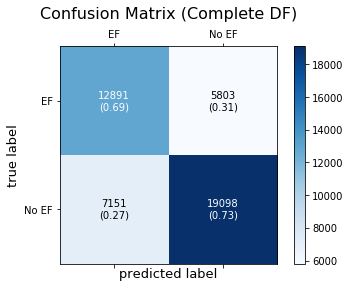

<Figure size 432x288 with 0 Axes>

In [328]:
cm = np.array([[12891,  5803],[ 7151, 19098]])

"""fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()"""
conf_mat=binary
show_absolute=True
show_normed=True
colorbar=True
figsize=None
cmap=None

if not (show_absolute or show_normed):
    raise AssertionError('Both show_absolute and show_normed are False')

total_samples = conf_mat.sum(axis=1)[:, np.newaxis]
normed_conf_mat = conf_mat.astype('float') / total_samples

fig, ax = plt.subplots(figsize=figsize)
ax.grid(False)
if cmap is None:
    cmap = plt.cm.Blues

if figsize is None:
    figsize = (len(conf_mat)*1.25, len(conf_mat)*1.25)

if show_absolute == True:
    matshow = ax.matshow(conf_mat, cmap=cmap)
else:
    matshow = ax.matshow(normed_conf_mat, cmap=cmap)

if colorbar == True:
    fig.colorbar(matshow)

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        cell_text = ""
        if show_absolute:
            cell_text += format(conf_mat[i, j], 'd')
            if show_normed:
                cell_text += "\n" + '('
                cell_text += format(normed_conf_mat[i, j], '.2f') + ')'
        else:
            cell_text += format(normed_conf_mat[i, j], '.2f')
        ax.text(x=j,
                y=i,
                s=cell_text,
                va='center',
                ha='center',
                color="white" if normed_conf_mat[i, j] > 0.5 else "black")

"""if hide_spines:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
if hide_ticks:
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_xaxis().set_ticks([])"""
ttl = plt.title('Confusion Matrix (Complete DF)', fontsize=(16))
#ttl = ax.title
ttl.set_position([.5, 1.1])

xl = plt.xlabel('predicted label', fontsize=13)
yl = plt.ylabel('true label', fontsize=13)
labels = ['EF', 'No EF']
plt.xticks(ticks=range(len(labels)), labels=labels)
plt.yticks(ticks=range(len(labels)), labels=labels)
plt.show()
plt.savefig('confusion_matrix.png')

In [327]:
print(fulldf.shape)
print(fulldf_weo.shape)
print(fulldf_edu.shape)
print(fulldf_health.shape)
print(total_fulldf.shape)

(149810, 105)
(149810, 147)
(149810, 259)
(149810, 342)
(149810, 538)


In [74]:
fidf = rfcfunc(Xtf, ytf)

/Users/christianbranton/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[12891  5803]
 [ 7151 19098]]
f1 score for cross validation: [0.743792   0.74307634 0.74755251 0.74187574 0.74746033]
f1 score mean for cv: 0.7447513816504577
f1_score for test: 0.7467448680351906


In [252]:
fidf.to_csv('feature_total.csv')

In [314]:
fidf

,importance
wgt,6.034072e-02
age,6.022265e-02
inc_q,4.917876e-02
saved,2.213088e-02
educ,2.161301e-02
fin2,1.822506e-02
fin11g,1.770712e-02
fin11b,1.695915e-02
female,1.599095e-02
fin16,1.545178e-02


In [312]:
tfidf = fidf.transpose()

In [313]:
tfidf.to_csv('feature_total.csv')

In [154]:
regionname = list(total_fulldf['regionwb'].unique())

regionname = regionname[:-1]
regioncountrydict = {}
for i in regionname:
    temp = total_fulldf[total_fulldf['regionwb'] == i]
    regioncountrydict[i] = list(temp.economy.unique())

In [160]:
regioncountrydict

{'South Asia': ['Afghanistan',
  'Bangladesh',
  'India',
  'Nepal',
  'Pakistan',
  'Sri Lanka'],
 'Europe & Central Asia (excluding high income)': ['Albania',
  'Armenia',
  'Azerbaijan',
  'Belarus',
  'Bosnia and Herzegovina',
  'Bulgaria',
  'Croatia',
  'Georgia',
  'Kazakhstan',
  'Kosovo',
  'Kyrgyz Republic',
  'Macedonia, FYR',
  'Moldova',
  'Montenegro',
  'Romania',
  'Russian Federation',
  'Serbia',
  'Tajikistan',
  'Turkey',
  'Turkmenistan',
  'Ukraine',
  'Uzbekistan'],
 'Middle East & North Africa (excluding high income)': ['Algeria',
  'Egypt, Arab Rep.',
  'Iran, Islamic Rep.',
  'Iraq',
  'Jordan',
  'Lebanon',
  'Libya',
  'Morocco',
  'Tunisia',
  'West Bank and Gaza'],
 'Latin America & Caribbean (excluding high income)': ['Argentina',
  'Bolivia',
  'Brazil',
  'Colombia',
  'Costa Rica',
  'Dominican Republic',
  'Ecuador',
  'El Salvador',
  'Guatemala',
  'Haiti',
  'Honduras',
  'Mexico',
  'Nicaragua',
  'Panama',
  'Paraguay',
  'Peru',
  'Venezuela, RB

In [176]:
c_names = list(total_fulldf.columns)
c_names.remove('fin25')
c_names.remove('fin24')
#c_names.remove('economy')
c_names.remove('economycode')
c_names.remove('wpid_random')
c_names.remove('regionwb')

In [137]:
countries2 = ['Afghanistan','Bulgaria']
countrydfnames=[]
for country in countries2:
    #countrydfnames.append(cdf)
    #cdf = country
    cmd_str = f"{country}df = total_fulldf[total_fulldf.economy == country]"
    exec(cmd_str)
    #country+'fidf'.fin24
#country+'df') = total_fulldf[total_fulldf.economy == country]

## MODELING BY COUNTRY (Complete Dataset)
The modeling was focused on logistic regression, random forest classifier, and xgboost.

In [129]:
#total_fulldf[total_fulldf.economy == 'Bulgaria']

In [212]:
def xgboostcountry(X, y, country):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=44)
    xgb = XGBClassifier(class_weight='balanced', random_state=44)
    xgb.fit(X_tr,y_tr)
    scores = cross_val_score(xgb, X_tr, y_tr, cv=5, scoring='f1')
    yxgbpred = xgb.predict(X_te)
    feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_tr.columns,
                                    columns=[country])#.sort_values('importance',ascending=False)
    print(confusion_matrix(y_te, yxgbpred))
    print('f1 score for cross validation:',scores)
    print('f1 score mean for cv:',np.mean(scores))
    print('f1_score for test:',f1_score(y_te, yxgbpred))
    return feature_importances

def xgboostcountry(X, y, region):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=44)
    xgb = XGBClassifier(class_weight='balanced', random_state=44)
    xgb.fit(X_tr,y_tr)
    scores = cross_val_score(xgb, X_tr, y_tr, cv=5, scoring='f1')
    yxgbpred = xgb.predict(X_te)
    feature_importances = pd.DataFrame(xgb.feature_importances_,
                                   index = X_tr.columns,
                                    columns=[region])#.sort_values('importance',ascending=False)
    print(confusion_matrix(y_te, yxgbpred))
    print('f1 score for cross validation:',scores)
    print('f1 score mean for cv:',np.mean(scores))
    print('f1_score for test:',f1_score(y_te, yxgbpred))
    return feature_importances

In [207]:
countries = list(total_fulldf.economy.unique())
country_list = []
#countries2 = ['Afghanistan','Bulgaria']
for country in countries:
    df = total_fulldf[total_fulldf['economy'] == country]
    y = df.fin24
    X = df.drop(['fin24','regionwb','economy','economycode','wpid_random','fin25'], axis=1)
    X = X.fillna(-9999)
    cdf = xgboostcountry(X,y,country)
    country_list.append(cdf)

[[ 73  50]
 [ 38 134]]
f1 score for cross validation: [0.75151515 0.73493976 0.75280899 0.78651685 0.8       ]
f1 score mean for cv: 0.7651561506495851
f1_score for test: 0.7528089887640451
[[106  41]
 [ 42 109]]
f1 score for cross validation: [0.79245283 0.83544304 0.70748299 0.71328671 0.76595745]
f1 score mean for cv: 0.7629246042911731
f1_score for test: 0.7242524916943522
[[ 38  39]
 [ 24 182]]
f1 score for cross validation: [0.86138614 0.82901554 0.83743842 0.82051282 0.8125    ]
f1 score mean for cv: 0.8321705853626906
f1_score for test: 0.8524590163934426
[[164  27]
 [ 47  51]]
f1 score for cross validation: [0.47619048 0.5        0.51764706 0.58139535 0.51282051]
f1 score mean for cv: 0.5176106793343456
f1_score for test: 0.5795454545454546
[[137  32]
 [ 52  62]]
f1 score for cross validation: [0.58       0.56       0.58252427 0.4494382  0.4893617 ]
f1 score mean for cv: 0.5322648352439023
f1_score for test: 0.5961538461538461
[[ 15  31]
 [ 14 235]]
f1 score for cross validati

In [208]:
country_fi_df = pd.concat(country_list, axis=1)

In [209]:
tcf = country_fi_df.transpose()

In [244]:
tcf.to_csv('feature_country.csv')

## MODELING BY REGION (Complete Dataset)
The modeling was focused on logistic regression, random forest classifier, and xgboost.
This was based on the complete dataset

In [213]:
regions = list(total_fulldf.regionwb.unique())[:-1]
region_list = []
for region in regions:
    df = total_fulldf[total_fulldf.regionwb == region]
    y = df.fin24
    X = df.drop(['fin24','regionwb','economy','economycode','wpid_random',
                  'fin25'], axis=1)
    X = X.fillna(-9999)
    rfidf = xgboost(X,y,region)
    region_list.append(rfidf)

[[ 826  394]
 [ 337 1004]]
f1 score for cross validation: [0.73040752 0.70643642 0.74518861 0.74012158 0.74691358]
f1 score mean for cv: 0.733813542329522
f1_score for test: 0.73311427528295
[[1151 1043]
 [ 541 3685]]
f1 score for cross validation: [0.81835564 0.82322275 0.824202   0.81118881 0.81468954]
f1 score mean for cv: 0.8183317480056125
f1_score for test: 0.8230958230958231
[[1365  527]
 [ 584 1662]]
f1 score for cross validation: [0.76244131 0.76172608 0.74878758 0.7594697  0.76085919]
f1 score mean for cv: 0.7586567727472298
f1_score for test: 0.7494926719278467
[[2123  573]
 [ 798 1354]]
f1 score for cross validation: [0.66832669 0.68410256 0.66805411 0.66496685 0.66141732]
f1 score mean for cv: 0.6693735088224338
f1_score for test: 0.6638882078940918
[[ 852 1210]
 [ 370 6659]]
f1 score for cross validation: [0.89542766 0.89637306 0.88898488 0.89366614 0.89127283]
f1 score mean for cv: 0.8931449146687012
f1_score for test: 0.8939454960397369
[[ 699  526]
 [ 402 1745]]
f1 sco

In [216]:
region_fi_df = pd.concat(region_list, axis=1)

In [217]:
trf = region_fi_df.transpose()

In [238]:
def most_important_feature(row):
    row_val = row.values
    index_num = np.argmax(row_val)
    return row.index[indetx_num]

In [241]:
tcf['most_important_feature'] = tcf.apply(most_important_feature, axis=1)

In [246]:
trf['most_important_feature'] = trf.apply(most_important_feature, axis=1)

In [248]:
trf.to_csv('feature_region.csv')

In [249]:
trf

,pop_adult,wgt,female,age,educ,inc_q,emp_in,fin2,fin3,fin4,...,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.REG.BRTH.FE.ZS,SP.REG.BRTH.MA.ZS,SP.REG.BRTH.RU.ZS,SP.REG.BRTH.UR.ZS,SP.REG.BRTH.ZS,SP.UWT.TFRT,most_important_feature
South Asia,0.031297,0.093890,0.022355,0.067064,0.038748,0.080477,0.007452,0.007452,0.000000,0.013413,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,wgt
Europe & Central Asia (excluding high income),0.000000,0.065123,0.004342,0.039074,0.040521,0.073806,0.001447,0.007236,0.001447,0.004342,...,0.001447,0.0,0.002894,0.0,0.0,0.0,0.0,0.0,0.0,inc_q
Middle East & North Africa (excluding high income),0.010101,0.085137,0.021645,0.056277,0.036075,0.079365,0.004329,0.033189,0.000000,0.004329,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,wgt
Latin America & Caribbean (excluding high income),0.004335,0.076590,0.021676,0.078035,0.036127,0.078035,0.008671,0.005780,0.000000,0.000000,...,0.004335,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,age
High income: OECD,0.005822,0.043668,0.020378,0.069869,0.046579,0.090247,0.001456,0.001456,0.000000,0.005822,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,inc_q
High income: nonOECD,0.002928,0.042460,0.016105,0.058565,0.030747,0.081991,0.013177,0.019034,0.001464,0.016105,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,inc_q
Sub-Saharan Africa (excluding high income),0.000000,0.047346,0.020086,0.050215,0.043042,0.073171,0.007174,0.011478,0.000000,0.000000,...,0.002869,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,inc_q
East Asia & Pacific (excluding high income),0.001502,0.079580,0.018018,0.082583,0.024024,0.073574,0.009009,0.004505,0.001502,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,age


In [ ]:
tensorflow